### To Explore Supervised Machine Learning.

In [1]:
# Importing essensial Library packeges

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


**Let us visualize the features using seaborn and matplotlib**

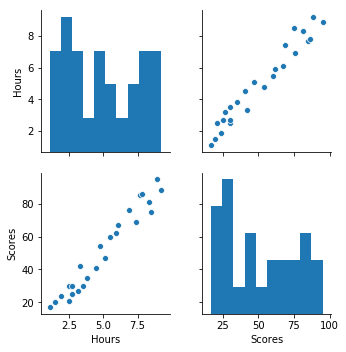

In [4]:
sns.pairplot(df)

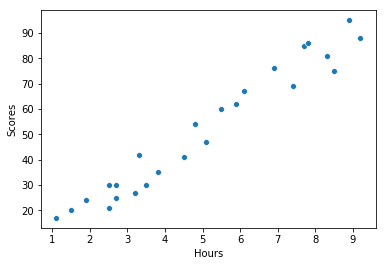

In [19]:
sns.scatterplot(x=df.Hours,y=df.Scores)

**We can see in the above figure scores and Houres are linearly correlated**


In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the above result we can see that Hours and Scores have high positive correlation**


In [6]:
X = df['Hours'].values.reshape(-1,1)
y  = df['Scores'].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 50)

### Building model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X_train,y_train)
prediction = model.predict(X_test)
prediction

array([[88.52660202],
       [29.49264435],
       [69.48338987],
       [39.96641103],
       [14.25807463],
       [46.63153529],
       [82.81363837],
       [29.49264435]])

In [11]:
result=pd.DataFrame(y_test.tolist(),columns=['Actual_value'])
result=result.join(pd.DataFrame(prediction.tolist(),columns=['Predicted_value']))

In [12]:
result

,Actual_value,Predicted_value
0,95,88.526602
1,30,29.492644
2,76,69.483390
3,35,39.966411
4,17,14.258075
5,41,46.631535
6,81,82.813638
7,25,29.492644


### Prediction

 **Que. What will be predicted score if a student study for 9.25 hrs in a day?**

In [18]:
print('The score of a student if he studies for 9.25 hrs in a day is:- {}'.format(model.predict(np.array(9.25).reshape(-1,1))))

The score of a student if he studies for 9.25 hrs in a day is:- [[91.85916415]]


##### Model Evaluation

In [20]:
mean_abs_error=metrics.mean_absolute_error(y_test, prediction)
print('Mean absolute error for this model is {}'.format(mean_abs_error))

Mean absolute error for this model is 4.142939772140698
